**Atualizando a biblioteca para plotagem de gráficos**


In [1]:
!pip -q install plotly --upgrade


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


**Para balanceamento de classes, veja os métodos em:**

https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html

**Importando bibliotecas**

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

**Abrindo um arquivo CSV do drive**

In [33]:
base = pd.read_csv('/content/sample_data/cancer.csv', sep=';')

In [34]:
base

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class
0,40-49,premeno,15-19,0-2,yes,3,right,left_up,no,recurrence-events
1,50-59,ge40,15-19,0-2,no,1,right,central,no,no-recurrence-events
2,50-59,ge40,35-39,0-2,no,2,left,left_low,no,recurrence-events
3,40-49,premeno,35-39,0-2,yes,3,right,left_low,yes,no-recurrence-events
4,40-49,premeno,30-34,3-5,yes,2,left,right_up,no,recurrence-events
...,...,...,...,...,...,...,...,...,...,...
281,50-59,ge40,30-34,6-8,yes,2,left,left_low,no,no-recurrence-events
282,50-59,premeno,25-29,3-5,yes,2,left,left_low,yes,no-recurrence-events
283,30-39,premeno,30-34,6-8,yes,2,right,right_up,no,no-recurrence-events
284,50-59,premeno,15-19,0-2,no,2,right,left_low,no,no-recurrence-events


**Verificando se tem ausência de dados**

In [35]:
base.isnull()

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
281,False,False,False,False,False,False,False,False,False,False
282,False,False,False,False,False,False,False,False,False,False
283,False,False,False,False,False,False,False,False,False,False
284,False,False,False,False,False,False,False,False,False,False


In [36]:
base.isnull().sum()

age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
Class          0
dtype: int64

**Verificando uma instância antes da imputação**.

**Veja que ele não tem o tipo NAN e sim a interrogação**

In [37]:
X_comNAN = base.iloc[20, 0:10]

In [38]:
X_comNAN

age                        50-59
menopause                   lt40
tumor-size                 20-24
inv-nodes                    0-2
node-caps                      ?
deg-malig                      1
breast                      left
breast-quad             left_low
irradiat                      no
Class          recurrence-events
Name: 20, dtype: object

**Podemos substituir todas as interrogações por 'NAN'**

In [39]:
base.replace('?', np.nan, inplace = True)

In [40]:
X_comNAN = base.iloc[20, 0:10]

In [41]:
X_comNAN

age                        50-59
menopause                   lt40
tumor-size                 20-24
inv-nodes                    0-2
node-caps                    NaN
deg-malig                      1
breast                      left
breast-quad             left_low
irradiat                      no
Class          recurrence-events
Name: 20, dtype: object

**Vamos contar tudo novamente?**

In [42]:
base.isnull().sum()

age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      8
deg-malig      0
breast         0
breast-quad    1
irradiat       0
Class          0
dtype: int64


**Podemos eliminar todas as instâncias que possuem dados ausentes**

In [43]:
#base = base.dropna()
#base.isnull().sum()

**Ou utilizar métodos de imputação...**

**Vamos imputá-los pela MODA**

In [44]:
base['node-caps'].fillna(base['node-caps'].mode()[0], inplace=True)

In [45]:
base['breast-quad'].fillna(base['breast-quad'].mode()[0], inplace=True)

In [46]:
base.isnull().sum()

age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
Class          0
dtype: int64

**Verificando a instância depois da imputação**

In [47]:
X_imputado = base.iloc[20, 0:10]

In [48]:
X_imputado

age                        50-59
menopause                   lt40
tumor-size                 20-24
inv-nodes                    0-2
node-caps                     no
deg-malig                      1
breast                      left
breast-quad             left_low
irradiat                      no
Class          recurrence-events
Name: 20, dtype: object

**Mas é possível termos várias tipos de eliminação de ausência**

1.   Remoção de objetos com valor ausente em qualquer atributo preditivo
2.   Remoção de objetos com valor ausente em todos os atributos preditivos
3. Remoção de objetos com valor ausente em qualquer/todos os atributos preditivos selecionados
4. Remoção de atributo preditivo com valor ausente em qualquer objeto
5. Remoção de atributo preditivo com valor ausente em todos os objetos
6. Remoção de atributo preditivo com valor ausente em um número determinado de objetivo



In [49]:
#Remoção de objetos com valor ausente em qualquer atributo preditivo
#Dro_Obj = base.dropna(how='any')

In [50]:
#Remoção de objetos com valor ausente em todos os atributos preditivos, inclusive a classe
#Dro_Obj = base.dropna(how='all')

In [51]:
#Remoção de objetos com valor ausente em qualquer/todos os atributos preditivos selecionados
#Dro_Obj = base.dropna(how='any', subset=['age','menopause']
#Dro_Obj = base.dropna(how='all', subset=['coluna1', 'coluna2']

In [52]:
#Remoção de atributo preditivo com valor ausente em qualquer objeto
#Dro_atrib = base.dropna(axis='columns')

In [53]:
#Remoção de atributo preditivo com valor ausente em qualquer objeto
#Dro_atrib = base.dropna(axis='columns', how='all']

In [54]:
#Remoção de atributo preditivo com valor ausente em um número determinado de objetivo
#Dro_atrib = base.dropna(axis='columns', thresh=3]

**Contando e visualizando a quantidade de opções que temos em cada atributo**

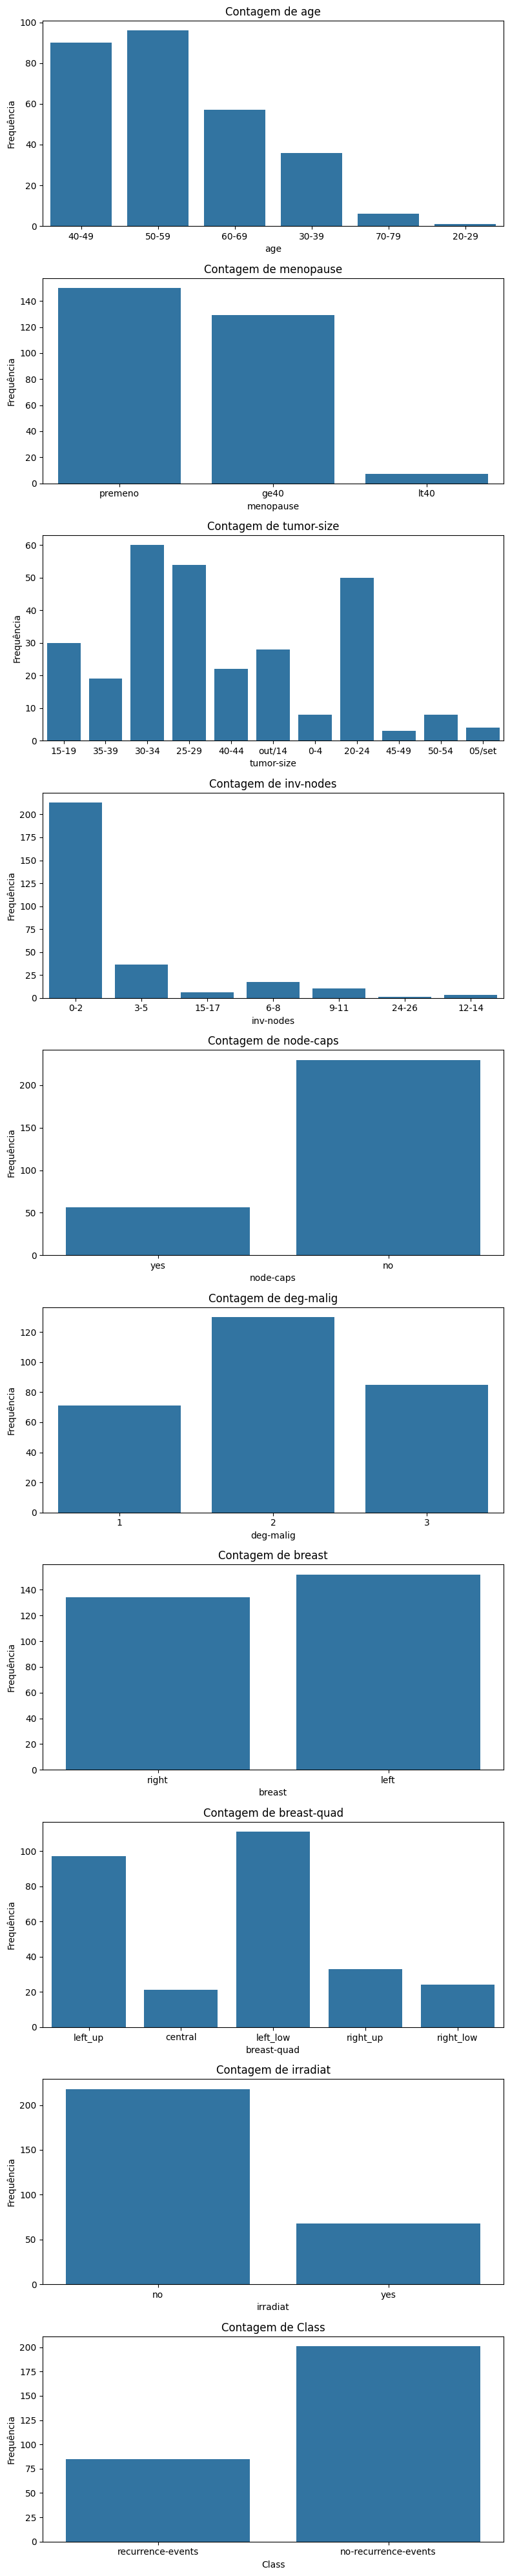

In [55]:
# Definindo o número de colunas
num_cols = len(base.columns)

# Definir o layout para os gráficos
fig, axes = plt.subplots(nrows=num_cols, ncols=1, figsize=(8, num_cols*4))

# Iterar sobre cada coluna categórica e gerar um gráfico de barras
for i, col in enumerate(base.columns):
    sns.countplot(data=base, x=col, ax=axes[i])
    axes[i].set_title(f'Contagem de {col}')
    axes[i].set_xlabel(f'{col}')
    axes[i].set_ylabel('Frequência')

plt.tight_layout()
plt.show()

**Tratamento de dados categóricos**

> *LabelEncoder - Vamos tratar os dados categóricos colocando 1, 2, 3 e etc**



In [56]:
from sklearn.preprocessing import LabelEncoder

In [57]:
label_encoder = LabelEncoder()



>** OneHotEncoder - Agora vamos binarizar atributos não ordinais**

In [58]:
#base= base.apply(LabelEncoder().fit_transform)
cols_label_encode = ['age', 'menopause', 'tumor-size','inv-nodes', 'node-caps','breast', 'breast-quad','irradiat']
base[cols_label_encode] = base[cols_label_encode].apply(LabelEncoder().fit_transform)

**Dividindo entre variável dependente e independente**

In [59]:
X_prev= base.iloc[:, :-1]
y_classe = base.iloc[:, -1]
print(X_prev.shape)
print(y_classe.shape)

(286, 9)
(286,)


**Método de amostragem Holdout**

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
y_classe.shape

(286,)

In [62]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X_prev, y_classe, test_size = 0.20, random_state = 0)

In [63]:
X_treino.shape

(228, 9)

In [64]:
X_teste.shape

(58, 9)

**Vamos treinar o modelo com as classes desbalanceadas?**

In [65]:
from sklearn.ensemble import RandomForestClassifier
modelo = RandomForestClassifier(n_estimators=100, max_features=6, criterion='gini', random_state = 0)
modelo.fit(X_treino, y_treino)

RandomForestClassifier(max_features=6, random_state=0)

In [66]:
previsoes = modelo.predict(X_teste)

In [67]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_teste,previsoes)

0.7068965517241379

In [68]:
from yellowbrick.classifier import ConfusionMatrix
confusion_matrix(y_teste, previsoes)

array([[33,  3],
       [14,  8]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0.7068965517241379

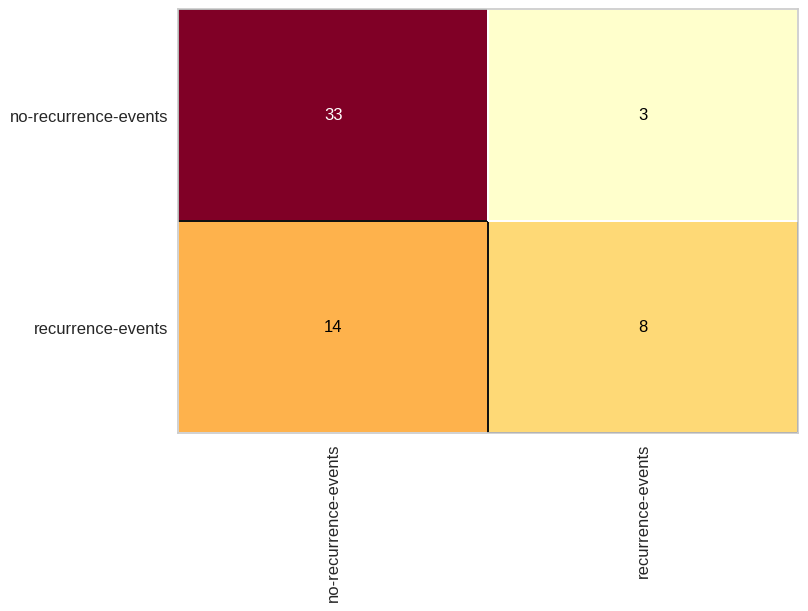

In [69]:
cm = ConfusionMatrix(modelo)
cm.fit(X_treino, y_treino)
cm.score(X_teste, y_teste)

In [70]:
print(classification_report(y_teste, previsoes))

                      precision    recall  f1-score   support

no-recurrence-events       0.70      0.92      0.80        36
   recurrence-events       0.73      0.36      0.48        22

            accuracy                           0.71        58
           macro avg       0.71      0.64      0.64        58
        weighted avg       0.71      0.71      0.68        58



**Vamos balancear os dados usando um método undersampling?**

In [71]:
from imblearn.under_sampling import TomekLinks

In [72]:
balanceamento_under = TomekLinks(sampling_strategy='auto')
X_under, y_under = balanceamento_under.fit_resample(X_treino, y_treino)

**Quantas instâncias tinha em cada classe originalmente?**

In [73]:
np.unique(y_treino, return_counts=True)

(array(['no-recurrence-events', 'recurrence-events'], dtype=object),
 array([165,  63]))

**Quantas instâncias tem agora após o balanceamento?**

In [74]:
np.unique(y_under, return_counts=True)

(array(['no-recurrence-events', 'recurrence-events'], dtype=object),
 array([153,  63]))

**Vamos ver se o balanceamento melhorou a qualidade do modelo?**

In [75]:
modelo2 = RandomForestClassifier(n_estimators=100, max_features=6, criterion='gini', random_state = 0)
modelo2.fit(X_under, y_under)

RandomForestClassifier(max_features=6, random_state=0)

In [76]:
previsoes = modelo2.predict(X_teste)

In [77]:
accuracy_score(y_teste,previsoes)

0.7068965517241379

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0.7068965517241379

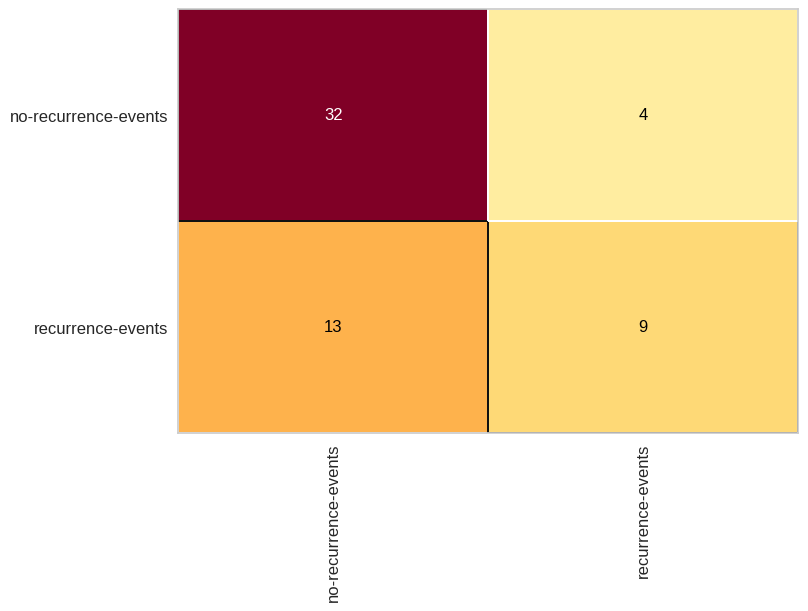

In [78]:
cm = ConfusionMatrix(modelo2)
cm.fit(X_under, y_under)
cm.score(X_teste, y_teste)

In [79]:
print(classification_report(y_teste, previsoes))

                      precision    recall  f1-score   support

no-recurrence-events       0.71      0.89      0.79        36
   recurrence-events       0.69      0.41      0.51        22

            accuracy                           0.71        58
           macro avg       0.70      0.65      0.65        58
        weighted avg       0.70      0.71      0.69        58



**Ou podemos também utilizar um método oversampling**

In [80]:
from imblearn.over_sampling import SMOTE

In [81]:
balanceamento_over = SMOTE(sampling_strategy='minority')
X_over, y_over = balanceamento_over.fit_resample(X_treino, y_treino)

**Vamos balancear os dados usando um método Oversampling?**

In [82]:
from imblearn.over_sampling import SMOTE

In [83]:
balanceamento_over = SMOTE(sampling_strategy='minority')
X_over, y_over = balanceamento_over.fit_resample(X_treino, y_treino)

In [84]:
X_over.shape, y_over.shape

((330, 9), (330,))

**Quantas instâncias tinha em cada classe originalmente?**

In [85]:
np.unique(y_treino, return_counts=True)

(array(['no-recurrence-events', 'recurrence-events'], dtype=object),
 array([165,  63]))

**Quantas instâncias tem agora após o balanceamento?**

In [86]:
np.unique(y_over, return_counts=True)

(array(['no-recurrence-events', 'recurrence-events'], dtype=object),
 array([165, 165]))

**Vamos ver se o balanceamento melhorou a qualidade do modelo?**

In [87]:
modelo2 = RandomForestClassifier(n_estimators=100, max_features=6, criterion='gini', random_state = 0)
modelo2.fit(X_over, y_over)

RandomForestClassifier(max_features=6, random_state=0)

In [88]:
previsoes = modelo2.predict(X_teste)

In [89]:
accuracy_score(y_teste,previsoes)

0.6896551724137931

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0.6896551724137931

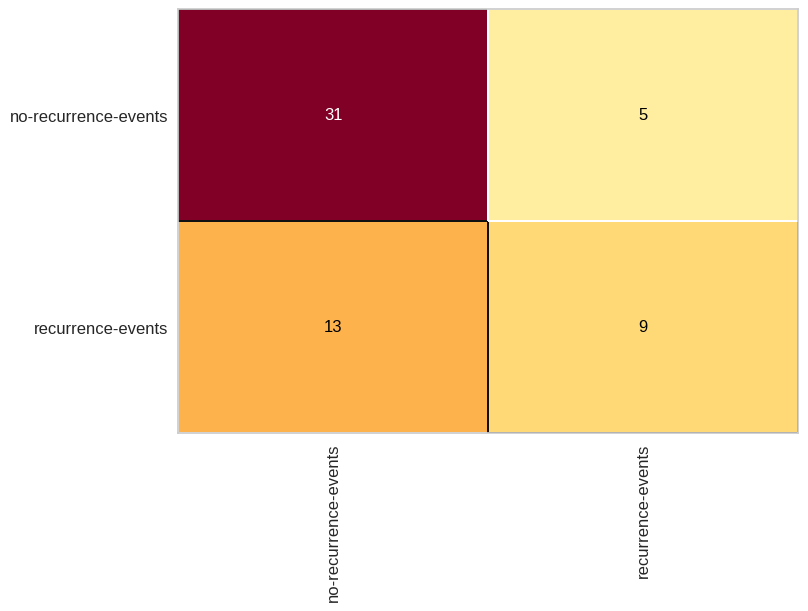

In [90]:
cm = ConfusionMatrix(modelo2)
cm.fit(X_over, y_over)
cm.score(X_teste, y_teste)

In [91]:
print(classification_report(y_teste, previsoes))

                      precision    recall  f1-score   support

no-recurrence-events       0.70      0.86      0.78        36
   recurrence-events       0.64      0.41      0.50        22

            accuracy                           0.69        58
           macro avg       0.67      0.64      0.64        58
        weighted avg       0.68      0.69      0.67        58

